<a href="https://colab.research.google.com/github/Rishita32/Kaggle-Machine-Learning-Practice/blob/main/Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
drive.mount('/content/drive', force_remount=True)
data=pd.read_csv('drive/MyDrive/Machine Learning Practice/datasets/adult_dataset.csv')

Mounted at /content/drive


# EDA

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
(data['workclass']=='?').sum()

1836

In [ ]:
(data['occupation']=='?').sum()

1843

In [ ]:
(data=='?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [ ]:
#drop the rows with '?' entry

data=data[data['workclass']!='?']
data=data[data['occupation']!='?']
data=data[data['native.country']!='?']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<ipython-input-11-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

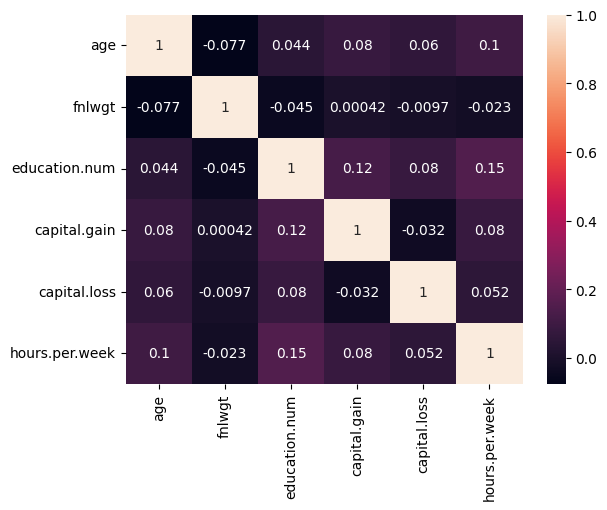

In [ ]:
sns.heatmap(data.corr(), annot=True)

there's no strong correlation

<Axes: xlabel='age', ylabel='income'>

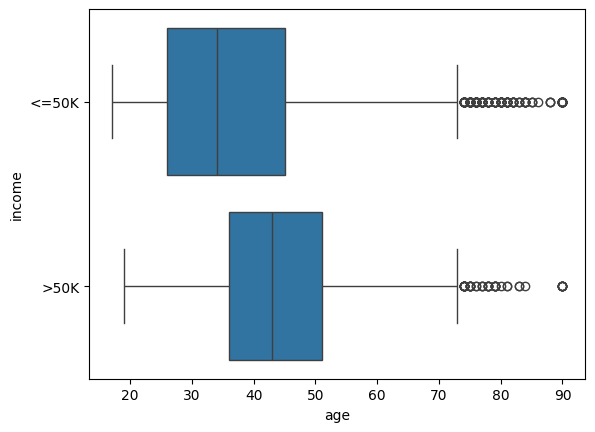

In [ ]:
sns.boxplot(x='age', y='income', data=data)

<Axes: xlabel='workclass', ylabel='income'>

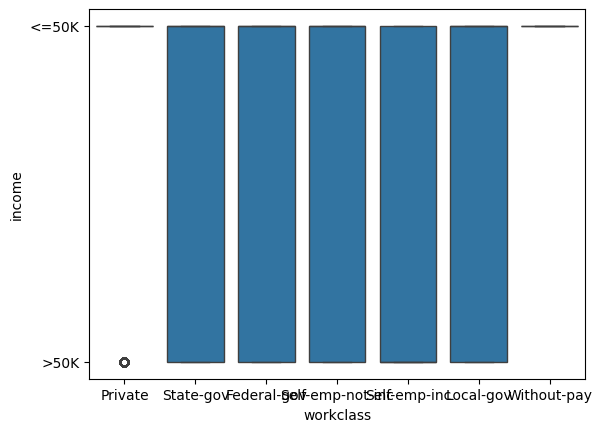

In [ ]:
sns.boxplot(x='workclass', y='income', data=data)

<Axes: xlabel='occupation', ylabel='income'>

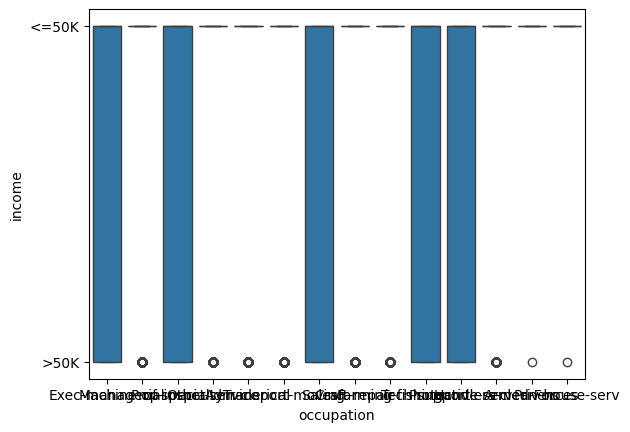

In [ ]:
sns.boxplot(x='occupation', y='income', data=data)

# Label Encoding

In [ ]:
df_categorical=data.select_dtypes(include=['object'])

In [ ]:
encode=LabelEncoder()

df_categorical_encode=df_categorical.apply(encode.fit_transform)

In [ ]:
data=data.drop(df_categorical.columns, axis=1)
data=pd.concat([data, df_categorical_encode], axis=1)

# Model Training

In [ ]:
X=data.drop('income', axis=1)
y=data['income']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [ ]:
model=AdaBoostClassifier()

nfolds=5

param_grid={"n_estimators": [1, 2]}

stumps=GridSearchCV(
    model,
    cv=nfolds,
    param_grid=param_grid,
    scoring="accuracy"
)

stumps.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [1, 2]}, scoring='accuracy')

In [ ]:
y_pred=stumps.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      4524
           1       0.73      0.36      0.48      1509

    accuracy                           0.81      6033
   macro avg       0.78      0.66      0.68      6033
weighted avg       0.80      0.81      0.78      6033

